In [14]:
import pandas as pd
import numpy as np
import math

In [15]:
from scipy import signal

In [16]:
import matplotlib.pyplot as plt

In [17]:
def draw_trend(timeSeries, size0, size1, title):
    f = plt.figure(facecolor='white')
    rol_mean = timeSeries.rolling(window=size0).mean().rolling(window=size1).mean()
    rol_weighted_mean = timeSeries.ewm(span=size0, min_periods=0, adjust=True, ignore_na=False).mean().ewm(span=size1,
                                       min_periods=0, adjust=True,ignore_na=False).mean();
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title(title)

In [18]:
user_balance_table = pd.read_csv(r"./user_balance_table.csv", sep=',', engine='python', encoding='utf-8',
                                 parse_dates=['report_date']);

mfd_day_share_interest = pd.read_csv(r"./mfd_day_share_interest.csv", sep=',', engine='python', encoding='utf-8',
                                     parse_dates=['mfd_date']);

mfd_bank_shibor = pd.read_csv(r"./mfd_bank_shibor.csv", sep=',', engine='python', encoding='utf-8',
                              parse_dates=['mfd_date']);

user_balance_table = user_balance_table.fillna(0);

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


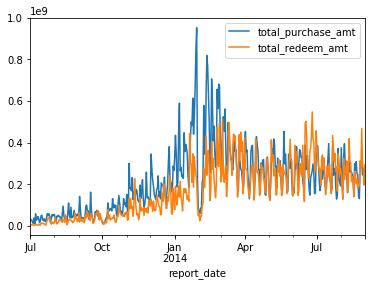

In [19]:
user_balance = user_balance_table.groupby(['report_date']);
purchase_redeem_total = user_balance['total_purchase_amt', 'total_redeem_amt'].sum();
purchase_redeem_total.plot();

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


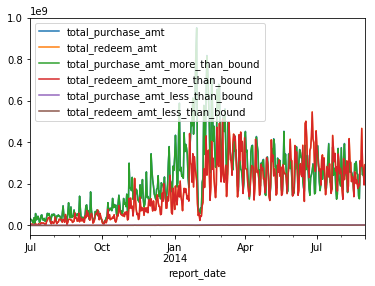

In [20]:
bound = 10000;

user_balance_op_more_than_bound = user_balance_table[
    (user_balance_table['total_purchase_amt'] >= bound) | (user_balance_table['total_redeem_amt'] >= bound)];
time_group_more_than_bound = user_balance_op_more_than_bound.groupby(['report_date']);
purchase_redeem_total_more_than_bound = time_group_more_than_bound['total_purchase_amt', 'total_redeem_amt'].sum();

purchase_redeem_total_more_than_bound = purchase_redeem_total_more_than_bound.rename(
    columns={'total_purchase_amt': 'total_purchase_amt_more_than_bound'});
purchase_redeem_total_more_than_bound = purchase_redeem_total_more_than_bound.rename(
    columns={'total_redeem_amt': 'total_redeem_amt_more_than_bound'});

user_balance_op_less_than_bound = user_balance_table[
    (user_balance_table['total_purchase_amt'] < bound) & (user_balance_table['total_redeem_amt'] < bound)];
time_group_less_than_bound = user_balance_op_less_than_bound.groupby(['report_date']);
purchase_redeem_total_less_than_bound = time_group_less_than_bound['total_purchase_amt', 'total_redeem_amt'].sum();

purchase_redeem_total_less_than_bound = purchase_redeem_total_less_than_bound.rename(
    columns={'total_purchase_amt': 'total_purchase_amt_less_than_bound'});
purchase_redeem_total_less_than_bound = purchase_redeem_total_less_than_bound.rename(
    columns={'total_redeem_amt': 'total_redeem_amt_less_than_bound'});
purchase_redeem_total_concat_result = pd.concat([purchase_redeem_total, purchase_redeem_total_more_than_bound], axis=1);
purchase_redeem_total_concat_result = pd.concat(
    [purchase_redeem_total_concat_result, purchase_redeem_total_less_than_bound], axis=1);
purchase_redeem_total_concat_result.plot();

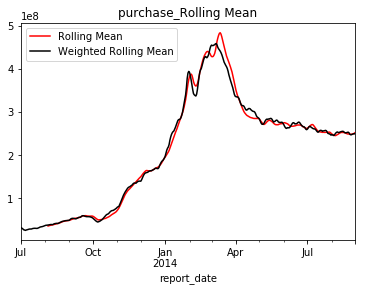

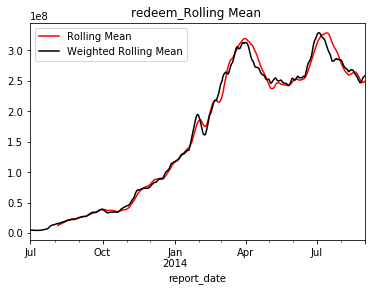

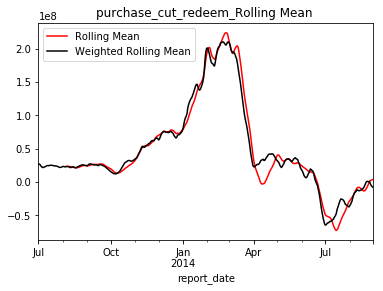

In [21]:
draw_trend(purchase_redeem_total['total_purchase_amt'], 7, 30, 'purchase_Rolling Mean');
draw_trend(purchase_redeem_total['total_redeem_amt'], 7, 30, 'redeem_Rolling Mean ');
draw_trend(purchase_redeem_total['total_purchase_amt'] - purchase_redeem_total['total_redeem_amt'], 7, 30,
           'purchase_cut_redeem_Rolling Mean ');
plt.draw()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


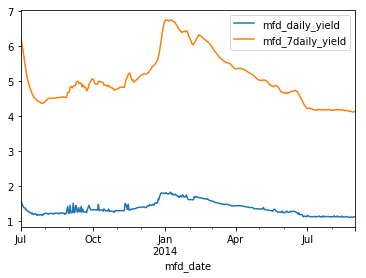

In [22]:
time_mfd_day_share_interest = mfd_day_share_interest.groupby(['mfd_date']);
share_interest = time_mfd_day_share_interest['mfd_daily_yield', 'mfd_7daily_yield'].sum();
share_interest.plot();
plt.draw()

In [23]:
date = pd.DataFrame(purchase_redeem_total.index);
date['day_of_week'] = date['report_date'].dt.dayofweek;
tt_date = date.groupby(['report_date']);
tt_date = tt_date['day_of_week'].sum();

t_mfd_bank_shibor = (mfd_bank_shibor.groupby(['mfd_date']));
time_mfd_bank_shibor = t_mfd_bank_shibor['Interest_O_N'].sum();
time_mfd_bank_shibor.fillna(method='pad');

corr_pd = pd.concat([purchase_redeem_total, share_interest, time_mfd_bank_shibor, tt_date], axis=1);
corr_pd = corr_pd.fillna(method='pad');
pd.set_option('display.width',None)
corr_table = corr_pd.corr();
print(corr_table);
corr_table.to_csv('./corr.csv', index=True, sep=',');

                    total_purchase_amt  total_redeem_amt  mfd_daily_yield  \
total_purchase_amt            1.000000          0.732118         0.435140   
total_redeem_amt              0.732118          1.000000         0.047801   
mfd_daily_yield               0.435140          0.047801         1.000000   
mfd_7daily_yield              0.426814          0.041836         0.976506   
Interest_O_N                 -0.241926         -0.432245         0.057973   
day_of_week                  -0.273350         -0.241266        -0.039447   

                    mfd_7daily_yield  Interest_O_N  day_of_week  
total_purchase_amt          0.426814     -0.241926    -0.273350  
total_redeem_amt            0.041836     -0.432245    -0.241266  
mfd_daily_yield             0.976506      0.057973    -0.039447  
mfd_7daily_yield            1.000000      0.030428    -0.014509  
Interest_O_N                0.030428      1.000000    -0.027013  
day_of_week                -0.014509     -0.027013     1.000000 

In [ ]:
date = pd.DataFrame(purchase_redeem_total.index);
date['day_of_week'] = date['report_date'].dt.dayofweek;
tt_date = date.groupby(['report_date']);
tt_date = tt_date['day_of_week'].sum();

t_mfd_bank_shibor = (mfd_bank_shibor.groupby(['mfd_date']));
time_mfd_bank_shibor = t_mfd_bank_shibor['Interest_O_N'].sum();
time_mfd_bank_shibor.fillna(method='pad');

corr_pd = pd.concat([purchase_redeem_total, share_interest, time_mfd_bank_shibor, tt_date], axis=1);
corr_pd = corr_pd.fillna(method='pad');
pd.set_option('display.width',None)
corr_table = corr_pd.corr();
print(corr_table);
corr_table.to_csv('./corr.csv', index=True, sep=',');